In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

### American Community Survey

In [2]:
df_pop = pd.read_csv('../data/population.csv')
df_code = pd.read_csv('../data/code.csv')

In [3]:
df_pop.head()

,NAME,ZIPCODE,S2401_C01_004E,S2401_C01_005E,S2401_C01_007E,S2401_C01_008E,S2401_C01_009E,S2401_C01_011E,S2401_C01_012E,S2401_C01_013E,...,S2401_C01_024E,S2401_C01_025E,S2401_C01_027E,S2401_C01_028E,S2401_C01_030E,S2401_C01_031E,S2401_C01_032E,S2401_C01_034E,S2401_C01_035E,S2401_C01_036E
0,ZCTA5 06390,6390.0,6.0,0.0,0.0,3.0,0.0,0.0,0.0,5.0,...,8.0,0.0,5.0,2.0,0.0,20.0,0.0,0.0,19.0,0.0
1,ZCTA5 10001,10001.0,3387.0,2039.0,948.0,196.0,133.0,135.0,452.0,601.0,...,385.0,94.0,1616.0,1260.0,0.0,147.0,65.0,157.0,297.0,199.0
2,ZCTA5 10002,10002.0,3390.0,2269.0,1585.0,524.0,323.0,545.0,735.0,1712.0,...,1340.0,1237.0,3137.0,3575.0,0.0,649.0,293.0,963.0,969.0,502.0
3,ZCTA5 10003,10003.0,6375.0,4485.0,1567.0,537.0,453.0,588.0,1327.0,1999.0,...,290.0,690.0,3376.0,2175.0,0.0,115.0,64.0,166.0,169.0,205.0
4,ZCTA5 10004,10004.0,573.0,375.0,206.0,14.0,0.0,62.0,262.0,69.0,...,0.0,0.0,270.0,179.0,0.0,0.0,0.0,14.0,0.0,0.0


In [4]:
df_code.head()

,GEO_ID,Family,Category,Occupation,Essential
0,S2401_C01_004E,"Management, business, science, and arts occupa...","Management, business, and financial occupations",Management occupations,0
1,S2401_C01_005E,"Management, business, science, and arts occupa...","Management, business, and financial occupations",Business and financial operations occupations,0
2,S2401_C01_007E,"Management, business, science, and arts occupa...","Computer, engineering, and science occupations",Computer and mathematical occupations,0
3,S2401_C01_008E,"Management, business, science, and arts occupa...","Computer, engineering, and science occupations",Architecture and engineering occupations,0
4,S2401_C01_009E,"Management, business, science, and arts occupa...","Computer, engineering, and science occupations","Life, physical, and social science occupations",0


In [9]:
# calculate the total working population
df_pop['total'] = df_pop.iloc[:, 2:].sum(axis=1)

In [11]:
# columns for essential workers
col_ess = df_code[df_code['Essential'] == 1]['GEO_ID']

In [14]:
# calculate the total essential workers
df_pop['essential'] = df_pop[col_ess].sum(axis=1)

In [15]:
# calculate the ratio of essential workers
df_pop['ratio'] = df_pop['essential'] / df_pop['total']

In [22]:
# extract necessary columns
df_ratio = df_pop[['ZIPCODE', 'ratio']]
df_ratio = df_ratio.dropna()
df_ratio

,ZIPCODE,ratio
0,6390.0,0.680000
1,10001.0,0.201988
2,10002.0,0.365540
3,10003.0,0.144650
4,10004.0,0.113903
...,...,...
1789,14898.0,0.618926
1790,14901.0,0.559326
1791,14903.0,0.488484
1792,14904.0,0.542368


In [18]:
# zipcode shape file
zipcode = gpd.read_file('../Data/ZIPCODE/ZIP_CODE_040114.shp')
zipcode.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."


In [23]:
# convert the data type of ZIPCODE for join
df_ratio['ZIPCODE'] = df_ratio['ZIPCODE'].astype('int')
zipcode['ZIPCODE'] = zipcode['ZIPCODE'].astype('int')

In [25]:
# merge
gdf_ratio = zipcode.merge(df_ratio,left_on='ZIPCODE',right_on='ZIPCODE',how='left')
gdf_ratio.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,ratio
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ...",0.509361
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ...",0.392584
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ...",0.564104
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18...",0.377043
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17...",0.349901


<AxesSubplot:>

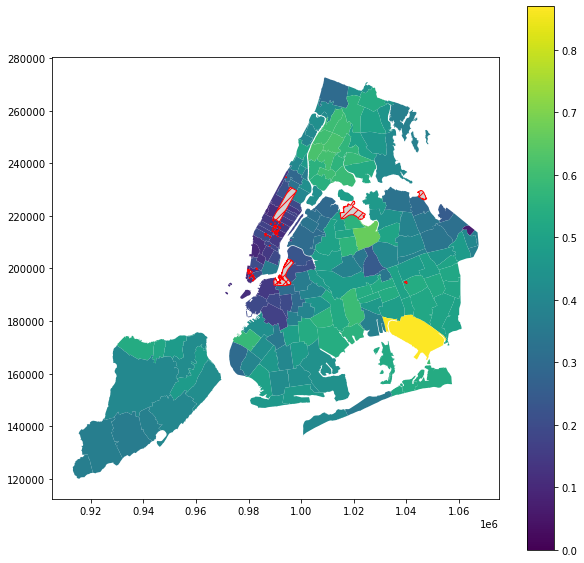

In [28]:
gdf_ratio.plot(column='ratio', legend=True,markersize=0.01,figsize=(10,10),missing_kwds={
                "color": "lightgrey", ## what to do with missing values
                "edgecolor": "red",
                "hatch": "///",
                "label": "Missing values",
                },)

<AxesSubplot:>

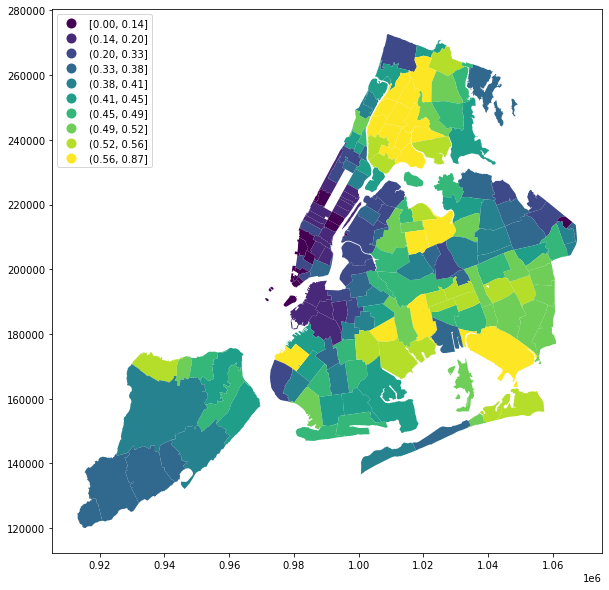

In [29]:
fig, ax = plt.subplots(1, figsize=(10,10))

gdf_ratio.plot(ax=ax, column='ratio', k=10, scheme='Quantiles', legend=True, 
              legend_kwds={'loc': 'upper left'})

### Taxi and FHV

In [36]:
df_taxi = pd.read_csv('../../Taxi/results/taxi_pickup.csv')
df_fhv = pd.read_csv('../../Taxi/results/fhv_pickup.csv')
df_taxi_ly = pd.read_csv('../../Taxi/results/taxi_pickup_ly.csv')
df_fhv_ly = pd.read_csv('../../Taxi/results/fhv_pickup_ly.csv')

In [32]:
df_all = pd.concat([df_taxi, df_fhv], axis=0)
df_all.head()

,type,pu_month,pu_day,pu_hour,pulocationid,trips
0,green,1,1,0,106,1
1,green,1,1,0,112,18
2,green,1,1,0,116,19
3,green,1,1,0,119,4
4,green,1,1,0,122,2


In [37]:
df_all_ly = pd.concat([df_taxi_ly, df_fhv_ly], axis=0)
df_all_ly.head()

,type,pu_month,pu_day,pu_hour,pulocationid,trips
0,green,3,1,0,100,1
1,green,3,1,0,106,2
2,green,3,1,0,112,11
3,green,3,1,0,116,7
4,green,3,1,0,119,1


In [31]:
#upload the shapefile; The 'location_i' column consists of all taxi zones within NYC + Newark airport
gdf_taxizone = gpd.read_file('https://data.cityofnewyork.us/api/geospatial/d3c5-ddgc?method=export&format=Shapefile')
gdf_taxizone.head()

,borough,location_i,objectid,shape_area,shape_leng,zone,geometry
0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
1,Queens,2.0,2.0,0.004866,0.433470,Jamaica Bay,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,Bronx,3.0,3.0,0.000314,0.084341,Allerton/Pelham Gardens,"POLYGON ((-73.84793 40.87134, -73.84725 40.870..."
3,Manhattan,4.0,4.0,0.000112,0.043567,Alphabet City,"POLYGON ((-73.97177 40.72582, -73.97179 40.725..."
4,Staten Island,5.0,5.0,0.000498,0.092146,Arden Heights,"POLYGON ((-74.17422 40.56257, -74.17349 40.562..."


In [33]:
df_lockdown = df_all[((df_all['pu_month'] == 3) & (df_all['pu_day'] >= 16)) | ((df_all['pu_month'] == 4) & (df_all['pu_day'] <= 16))]
df_lockdown.head()

,type,pu_month,pu_day,pu_hour,pulocationid,trips
177421,green,3,16,0,112,1
177422,green,3,16,0,116,1
177423,green,3,16,0,127,1
177424,green,3,16,0,129,5
177425,green,3,16,0,130,5


In [38]:
df_lockdown_ly = df_all_ly[((df_all_ly['pu_month'] == 3) & (df_all_ly['pu_day'] >= 16)) | ((df_all_ly['pu_month'] == 4) & (df_all_ly['pu_day'] <= 16))]
df_lockdown_ly.head()

,type,pu_month,pu_day,pu_hour,pulocationid,trips
39629,green,3,16,0,106,1
39630,green,3,16,0,112,27
39631,green,3,16,0,116,9
39632,green,3,16,0,127,2
39633,green,3,16,0,129,42


In [34]:
df_lockdown_agg = df_lockdown.groupby(['pulocationid']).agg({'trips': 'sum'})
df_lockdown_agg['trips'] = df_lockdown_agg['trips'] / 32
df_lockdown_agg.head()

,trips
pulocationid,
1,6.15625
2,0.43750
3,610.15625
4,497.96875
5,47.34375


In [39]:
df_lockdown_agg_ly = df_lockdown_ly.groupby(['pulocationid']).agg({'trips': 'sum'})
df_lockdown_agg_ly['trips'] = df_lockdown_agg_ly['trips'] / 32
df_lockdown_agg_ly.rename(columns={'trips': 'trips_ly'}, inplace=True)
df_lockdown_agg_ly.head()

,trips_ly
pulocationid,
1,86.50000
2,1.03125
3,1465.62500
4,3736.59375
5,163.87500


In [35]:
gdf_viz = gdf_taxizone.merge(df_lockdown_agg, left_on='location_i', right_on='pulocationid')
gdf_viz.head()

,borough,location_i,objectid,shape_area,shape_leng,zone,geometry,trips
0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695...",6.15625
1,Queens,2.0,2.0,0.004866,0.433470,Jamaica Bay,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...",0.43750
2,Bronx,3.0,3.0,0.000314,0.084341,Allerton/Pelham Gardens,"POLYGON ((-73.84793 40.87134, -73.84725 40.870...",610.15625
3,Manhattan,4.0,4.0,0.000112,0.043567,Alphabet City,"POLYGON ((-73.97177 40.72582, -73.97179 40.725...",497.96875
4,Staten Island,5.0,5.0,0.000498,0.092146,Arden Heights,"POLYGON ((-74.17422 40.56257, -74.17349 40.562...",47.34375


In [40]:
gdf_viz = gdf_viz.merge(df_lockdown_agg_ly, left_on='location_i', right_on='pulocationid')
gdf_viz.head()

,borough,location_i,objectid,shape_area,shape_leng,zone,geometry,trips,trips_ly
0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695...",6.15625,86.50000
1,Queens,2.0,2.0,0.004866,0.433470,Jamaica Bay,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...",0.43750,1.03125
2,Bronx,3.0,3.0,0.000314,0.084341,Allerton/Pelham Gardens,"POLYGON ((-73.84793 40.87134, -73.84725 40.870...",610.15625,1465.62500
3,Manhattan,4.0,4.0,0.000112,0.043567,Alphabet City,"POLYGON ((-73.97177 40.72582, -73.97179 40.725...",497.96875,3736.59375
4,Staten Island,5.0,5.0,0.000498,0.092146,Arden Heights,"POLYGON ((-74.17422 40.56257, -74.17349 40.562...",47.34375,163.87500


In [41]:
gdf_viz['yoy'] = gdf_viz['trips'] / gdf_viz['trips_ly'] - 1
gdf_viz.head()

,borough,location_i,objectid,shape_area,shape_leng,zone,geometry,trips,trips_ly,yoy
0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695...",6.15625,86.50000,-0.928829
1,Queens,2.0,2.0,0.004866,0.433470,Jamaica Bay,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...",0.43750,1.03125,-0.575758
2,Bronx,3.0,3.0,0.000314,0.084341,Allerton/Pelham Gardens,"POLYGON ((-73.84793 40.87134, -73.84725 40.870...",610.15625,1465.62500,-0.583689
3,Manhattan,4.0,4.0,0.000112,0.043567,Alphabet City,"POLYGON ((-73.97177 40.72582, -73.97179 40.725...",497.96875,3736.59375,-0.866732
4,Staten Island,5.0,5.0,0.000498,0.092146,Arden Heights,"POLYGON ((-74.17422 40.56257, -74.17349 40.562...",47.34375,163.87500,-0.711098


<AxesSubplot:>

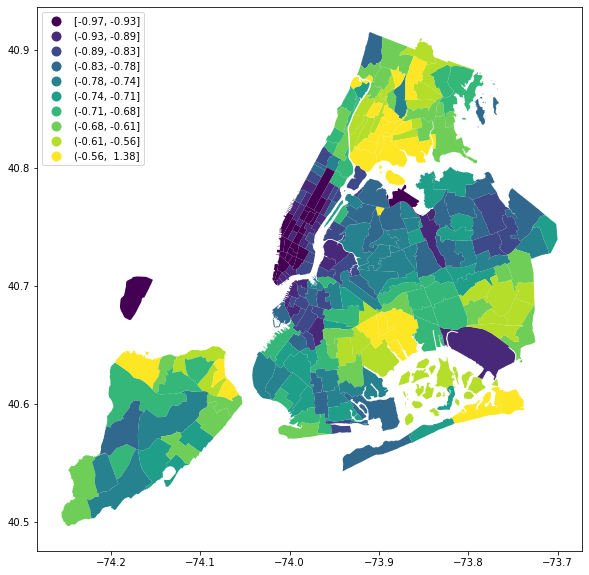

In [42]:
fig, ax = plt.subplots(1, figsize=(10,10))

gdf_viz.plot(ax=ax, column='yoy', k=10, scheme='Quantiles', legend=True, 
              legend_kwds={'loc': 'upper left'})

### Comparison

Text(0.5, 1.0, '# of Trips YoY: Taxi and FHV (Taxi Zone)')

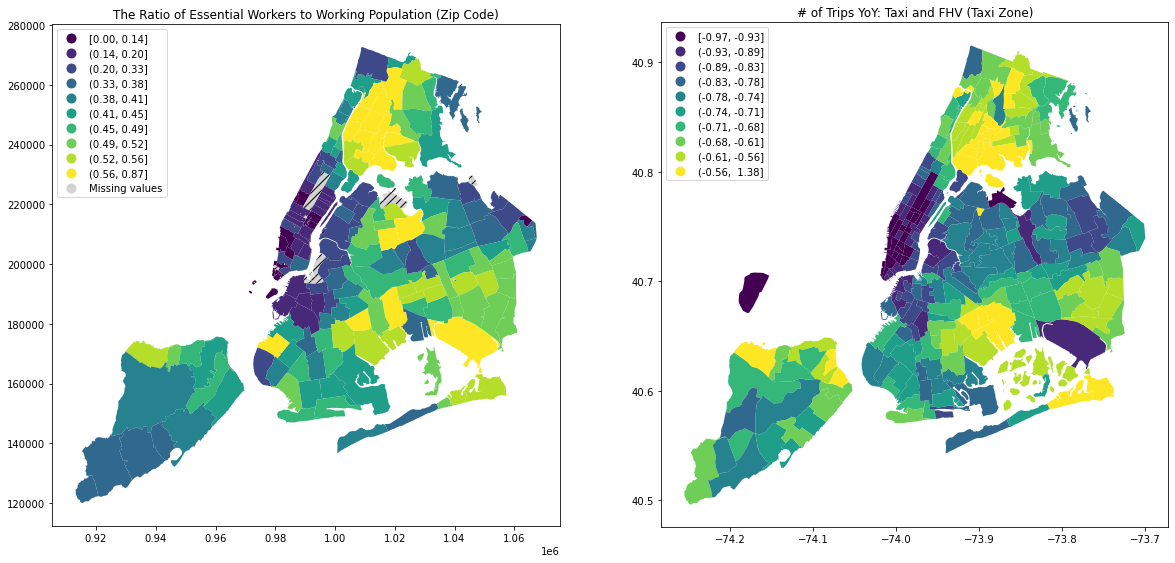

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

gdf_ratio.plot(ax=axes[0], column='ratio', k=10, scheme='Quantiles', legend=True, 
              legend_kwds={'loc': 'upper left'}, missing_kwds={
                "color": "lightgrey", ## what to do with missing values
                # "edgecolor": "red",
                "hatch": "///",
                "label": "Missing values"})

gdf_viz.plot(ax=axes[1], column='yoy', k=10, scheme='Quantiles', legend=True, 
              legend_kwds={'loc': 'upper left'})

axes[0].set_title('The Ratio of Essential Workers to Working Population (Zip Code)')
axes[1].set_title('# of Trips YoY: Taxi and FHV (Taxi Zone)')

In [58]:
len(gdf_ratio['ZIPCODE'].unique())

248

In [60]:
len(gdf_viz['location_i'].unique())

259

In [63]:
# export
gdf_ratio.to_file('../results/essential_workers.shp')

In [64]:
# export
gdf_viz.to_file('../results/taxi_fhv_yoy.shp')

In [66]:
gdf_ratio2 = gpd.read_file('../results/essential_workers/essential_workers.shp')
gdf_viz2 = gpd.read_file('../results/taxi_fhv/taxi_fhv_yoy.shp')

Text(0.5, 1.0, '# of Trips YoY: Taxi and FHV (Taxi Zone)')

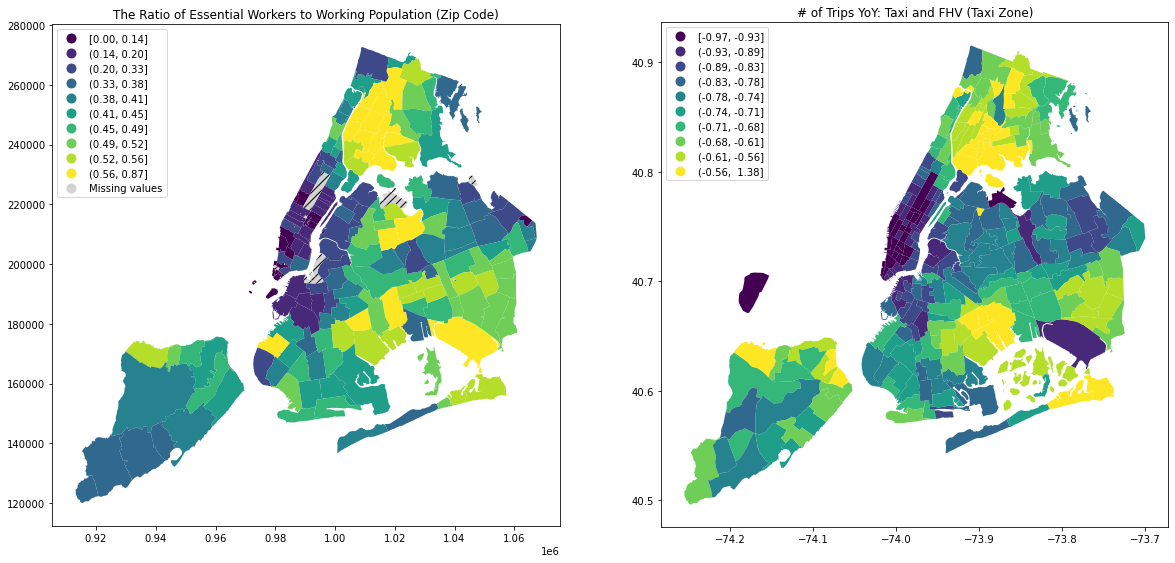

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

gdf_ratio2.plot(ax=axes[0], column='ratio', k=10, scheme='Quantiles', legend=True, 
              legend_kwds={'loc': 'upper left'}, missing_kwds={
                "color": "lightgrey", ## what to do with missing values
                # "edgecolor": "red",
                "hatch": "///",
                "label": "Missing values"})

gdf_viz2.plot(ax=axes[1], column='yoy', k=10, scheme='Quantiles', legend=True, 
              legend_kwds={'loc': 'upper left'})

axes[0].set_title('The Ratio of Essential Workers to Working Population (Zip Code)')
axes[1].set_title('# of Trips YoY: Taxi and FHV (Taxi Zone)')